In [ ]:
# Task 1: Data Cleaning and Preprocessing
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Data Set For Task/3) Sentiment dataset.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check columns
print(df.columns)

# Drop duplicates and missing values from 'text' column
df.drop_duplicates(inplace=True)
df.dropna(subset=['text'], inplace=True)

# Clean text
stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df['cleaned'] = df['text'].apply(clean_text)

print(df[['text', 'cleaned']].head())



Index(['unnamed: 0.1', 'unnamed: 0', 'text', 'sentiment', 'timestamp', 'user',
       'platform', 'hashtags', 'retweets', 'likes', 'country', 'year', 'month',
       'day', 'hour'],
      dtype='object')
                                                text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                            cleaned  
0       enjoying beautiful day park  
1          traffic terrible morning  
2          finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Task 2: Exploratory Data Analysis (EDA)
# Basic stats
print("Total reviews:", len(df))
print("Average review length:", df['cleaned'].str.split().apply(len).mean())

# Word frequency
from collections import Counter
all_words = " ".join(df['cleaned']).split()
common_words = Counter(all_words).most_common(10)
print("Top 10 common words:", common_words)


Total reviews: 732
Average review length: 8.077868852459016
Top 10 common words: [('new', 43), ('like', 27), ('day', 26), ('feeling', 26), ('dreams', 25), ('laughter', 24), ('heart', 24), ('night', 23), ('joy', 23), ('life', 22)]


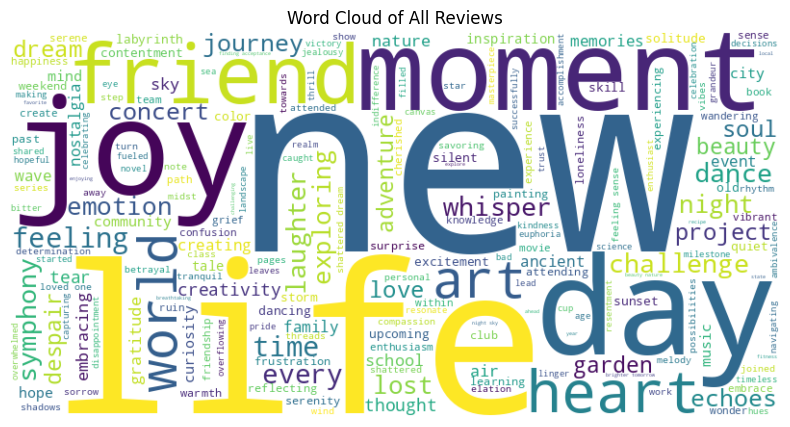

In [ ]:
# Task 3: Basic Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned']))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Reviews")
plt.show()


In [ ]:
# Task 1: Ensure the dataset has a date column
# Step 1: Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Step 2: Create timestamp from year, month, day, and hour
df['timestamp'] = pd.to_datetime(dict(
    year=df['year'],
    month=df['month'],
    day=df['day'],
    hour=df['hour']
), errors='coerce')

# Step 3: Drop rows where timestamp couldn't be created
df.dropna(subset=['timestamp'], inplace=True)

# Step 4: Set timestamp as index
df.set_index('timestamp', inplace=True)

print("✅ Timestamp column created and set as index.")
print(df[['text', 'cleaned']].head())


✅ Timestamp column created and set as index.
                                                                  text  \
timestamp                                                                
2023-01-15 12:00:00   Enjoying a beautiful day at the park!        ...   
2023-01-15 08:00:00   Traffic was terrible this morning.           ...   
2023-01-15 15:00:00   Just finished an amazing workout! 💪          ...   
2023-01-15 18:00:00   Excited about the upcoming weekend getaway!  ...   
2023-01-15 19:00:00   Trying out a new recipe for dinner tonight.  ...   

                                              cleaned  
timestamp                                              
2023-01-15 12:00:00       enjoying beautiful day park  
2023-01-15 08:00:00          traffic terrible morning  
2023-01-15 15:00:00          finished amazing workout  
2023-01-15 18:00:00  excited upcoming weekend getaway  
2023-01-15 19:00:00  trying new recipe dinner tonight  


/tmp/ipython-input-9-3035839529.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df['text'].resample('M').count()


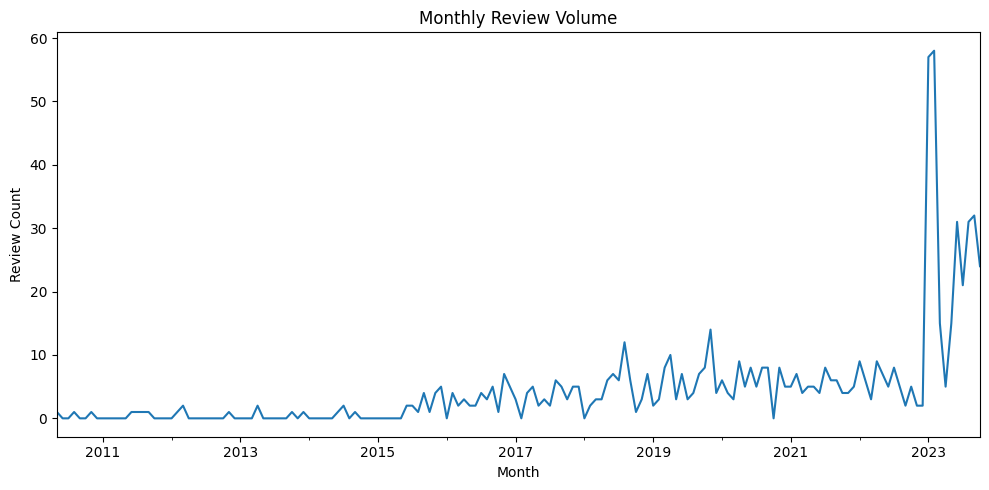

In [ ]:
# Plot review count by month
monthly_reviews = df['text'].resample('M').count()

import matplotlib.pyplot as plt
monthly_reviews.plot(figsize=(10,5), title="Monthly Review Volume")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-486213471.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack()
/tmp/ipython-input-11-486213471.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


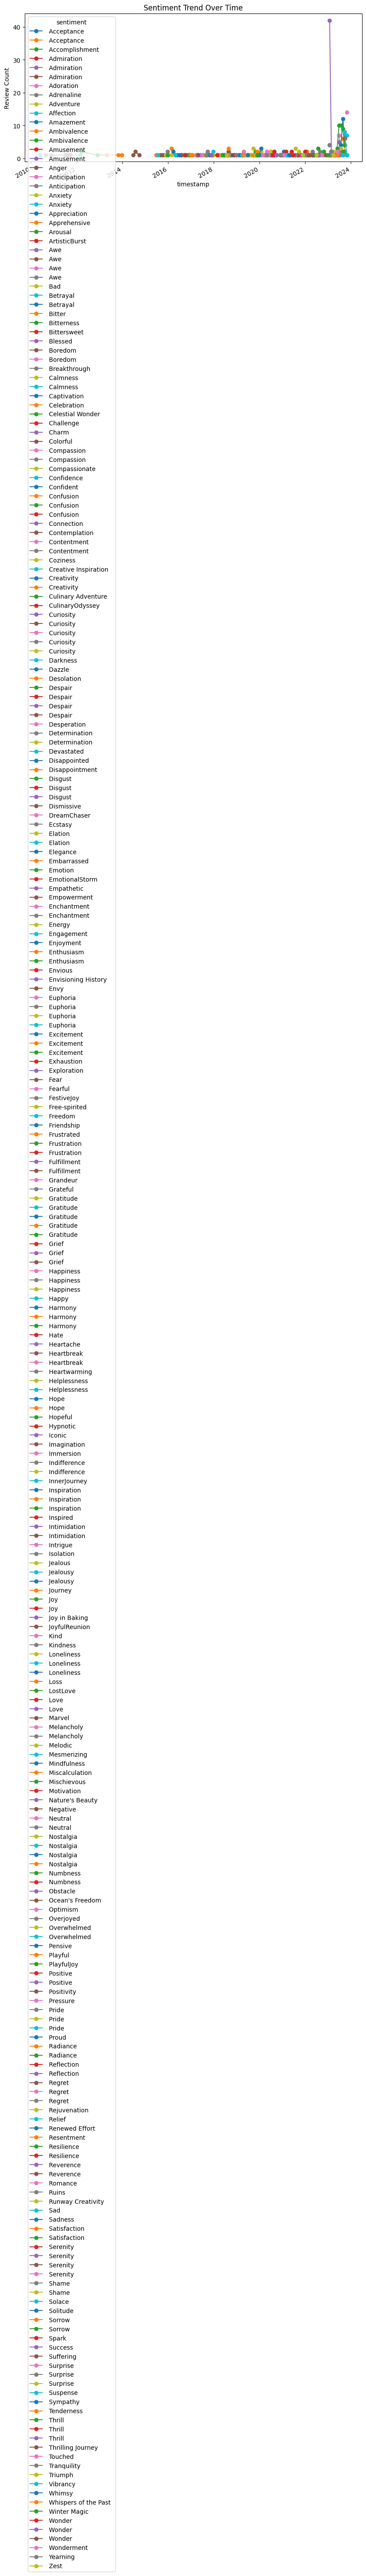

In [ ]:
# Sentiment count by month
monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack()

monthly_sentiment.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Sentiment Trend Over Time")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()


In [ ]:
# Task 1: Predictive Modeling (Classification)
from textblob import TextBlob

# Calculate polarity score
df['polarity'] = df['cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify into sentiment
def classify(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(classify)

# Check sample
print(df[['text', 'sentiment']].head())


                                                                  text  \
timestamp                                                                
2023-01-15 12:00:00   Enjoying a beautiful day at the park!        ...   
2023-01-15 08:00:00   Traffic was terrible this morning.           ...   
2023-01-15 15:00:00   Just finished an amazing workout! 💪          ...   
2023-01-15 18:00:00   Excited about the upcoming weekend getaway!  ...   
2023-01-15 19:00:00   Trying out a new recipe for dinner tonight.  ...   

                    sentiment  
timestamp                      
2023-01-15 12:00:00  Positive  
2023-01-15 08:00:00  Negative  
2023-01-15 15:00:00  Positive  
2023-01-15 18:00:00  Positive  
2023-01-15 19:00:00  Positive  


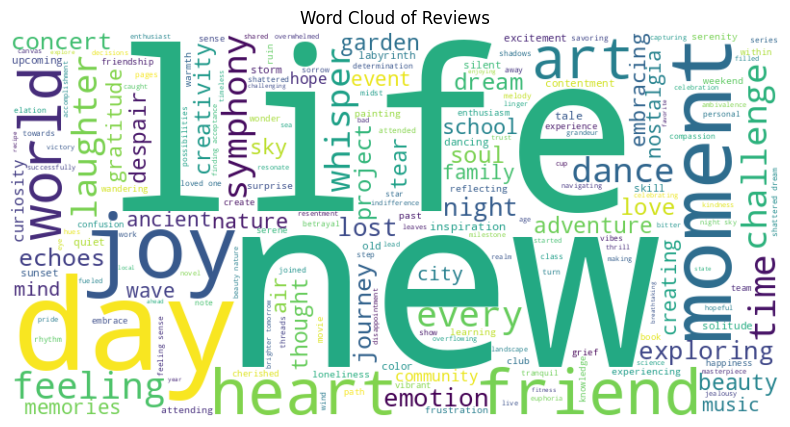

In [ ]:
# Task 2: Sentiment Visualization
from wordcloud import WordCloud

text = " ".join(df['cleaned'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


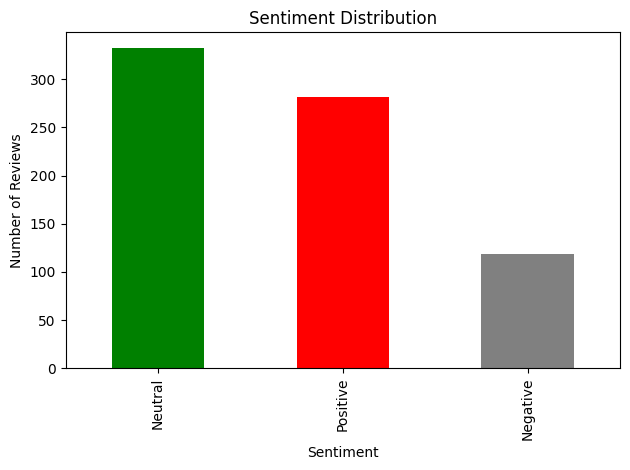

In [ ]:
# Task 3 : Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
#  Save Results
df.to_csv("sentiment_results.csv", index=False)
print("✔️ Results saved as sentiment_results.csv")


✔️ Results saved as sentiment_results.csv
